In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from haversine import haversine
import seaborn as sns

In [2]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [4]:
# UTM좌표를 WGS84로 변환

proj_UTM = Proj(init = 'epsg:5181')
proj_WGS84 = Proj(init='epsg:4326')

def UTM_to_WGS(df):
    X,Y = transform(proj_UTM,proj_WGS84,df['위치정보X'],df['위치정보Y'])
    return pd.DataFrame({'위도':Y,'경도':X},index = df.index)

c:\Users\wjdtj\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\wjdtj\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [10]:
df_hospital = pd.read_csv("C:/Users/wjdtj/OneDrive - dgu.ac.kr/데이터 분석/교통사고/병원/전북특별자치도 전주시_병원_20240118.csv",encoding='cp949')

def find_nearest_hospital(df):
    print('결측치 수:',df['위치정보X'].isna().sum())
    results = [] #결과를 담을 객체 생성

    for _, pedestrian in UTM_to_WGS(df).dropna().iterrows(): # 보행자의 위치별로 시행
        #가까운 학교와 최소 거리 초기화
        min_distance = float('inf')
        nearest_hospital = None

        for _, hospital in df_hospital.iterrows(): #보행자별 각 학교 시행
            hospital_location = (hospital['위도'], hospital['경도'])
            pedestrian_location = (pedestrian['위도'], pedestrian['경도'])

            #거리계산
            distance = haversine(pedestrian_location, hospital_location, unit='m') #거리 기준 변환가능
            
            if distance < min_distance: #최소거리와 학교를 담음
                min_distance = distance
                nearest_hospital = hospital
        #보행자별 시행을 마치고 result에 값을 담음
        results.append({
                '보행자_위도': pedestrian['위도'],
                '보행자_경도': pedestrian['경도'],
                '가장_가까운_병원': nearest_hospital['사업장명'],  # 학교명이 있는 열로 변경
                '가장_가까운_병원_위도': nearest_hospital['위도'],
                '가장_가까운_병원_경도': nearest_hospital['경도'],
                '거리': min_distance
            })
        
    return pd.DataFrame(results,index=df['위치정보X'].dropna().index)

In [11]:
df_hospital.head()

,사업장명,인허가일자,상세영업상태명,소재지전화,도로명주소,지번주소,위도,경도,업태구분명,의료기관종별명,의료인수,입원실수,병상수,총면적,진료과목내용명,데이터기준일자
0,가람한방병원,2014-04-30,영업중,063-270-8600,"전북특별자치도 전주시 덕진구 송천중앙로 60, 3~6층 (송천동1가)",전북특별자치도 전주시 덕진구 송천동1가 270-1,35.852438,127.120224,한방병원,한방병원,4,31,83,1530.26,가정의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+한방...,2024-01-18
1,나은요양병원,2012-06-26,영업중,063-715-2300,전북특별자치도 전주시 덕진구 기린대로 951 (여의동),전북특별자치도 전주시 덕진구 여의동 558-4,35.864427,127.080650,요양병원(일반요양병원),요양병원(일반요양병원),23,37,210,4311.40,내과+외과+가정의학과+한방내과+침구과,2024-01-18
2,누가한방병원,2009-11-04,영업중,063-252-9111,전북특별자치도 전주시 덕진구 안덕원로 218 (인후동1가),전북특별자치도 전주시 덕진구 인후동1가 594-14,35.835934,127.150924,한방병원,한방병원,3,18,84,1476.70,마취통증의학과+한방내과+한방부인과+한방소아과+한방안·이비인후·피부과+한방신경정신과+...,2024-01-18
3,다사랑병원,2005-03-16,영업중,063-228-5540,전북특별자치도 전주시 완산구 백제대로 74 (삼천동1가),전북특별자치도 전주시 완산구 삼천동1가 732-3,35.800878,127.127854,병원,병원,9,32,94,2379.94,내과+외과+정형외과+소아청소년과+응급의학과,2024-01-18
4,대자인병원,2012-05-01,영업중,063-240-2000,전북특별자치도 전주시 덕진구 견훤로 390 (우아동3가),전북특별자치도 전주시 덕진구 우아동3가 734-17,35.845991,127.153316,종합병원,종합병원,177,159,568,20505.60,내과+신경과+정신건강의학과+외과+정형외과+신경외과+흉부외과+마취통증의학과+산부인과+...,2024-01-18


In [12]:
df=pd.read_csv("C:/Users/wjdtj/OneDrive - dgu.ac.kr/데이터 분석/교통사고/오토바이/0518 좌표/좌표.저녁_old.csv")
dist_from_hospital = find_nearest_hospital(df)

결측치 수: 0


C:\Users\wjdtj\AppData\Local\Temp\ipykernel_26176\2148585781.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  X,Y = transform(proj_UTM,proj_WGS84,df['위치정보X'],df['위치정보Y'])


c:\Users\wjdtj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjdtj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


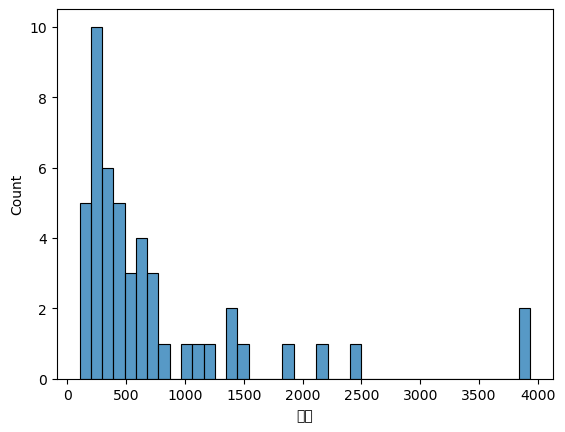

In [35]:
sns.histplot(dist_from_hospital['거리'],bins=40)
plt.show()

In [20]:
print('병원과 300m 이내에서 사고난 비율',np.round((dist_from_hospital['거리']<=300).sum()/len(dist_from_hospital),3))

print('\n병원과 400m 이내에서 사고난 비율',np.round((dist_from_hospital['거리']<=400).sum()/len(dist_from_hospital),3))

print('\n병원과 500m 이내에서 사고난 비율',np.round((dist_from_hospital['거리']<=500).sum()/len(dist_from_hospital),3))

병원과 300m 이내에서 사고난 비율 0.312

병원과 400m 이내에서 사고난 비율 0.458

병원과 500m 이내에서 사고난 비율 0.542
